# - Yahoo Finace- Stock Data
### - Mong'are Deborah Kerubo
### - Honor's Thesis  Research


#### Data Retrieveal and Pre-processing

In [1]:
# Import and install Libraries

import pandas as pd  # For data manipulation and analysis
import yfinance as yf  # For downloading historical stock data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Retrieve Historical Stock Data for Apple.Inc (AAPL) frrom January 1, 2010 to December 31, 2022
ticker = "AAPL"
start_date = "2010-01-01"
end_date = "2022-12-31"
data = yf.download(ticker, start=start_date, end=end_date)


/var/folders/vg/q66t8nnd5g5gwvf0w_gk_h7w0000gn/T/ipykernel_6281/912865014.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


In [3]:
# Explore the data
type(data)  # Check the type of the data
data.head()  # Display the first few rows of the data
data.info()  # Get information about the data
data.describe()  # Get statistical summary of the data
data.shape  # Get the shape of the data (rows, columns)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3272 entries, 2010-01-04 to 2022-12-30
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   3272 non-null   float64
 1   (High, AAPL)    3272 non-null   float64
 2   (Low, AAPL)     3272 non-null   float64
 3   (Open, AAPL)    3272 non-null   float64
 4   (Volume, AAPL)  3272 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 153.4 KB


(3272, 5)

- The DataFrame contains 3,272 rows and 5 columns with a DatetimeIndex from 2010-01-04 to 2022-12-30. 
- Each row represents one trading day for Apple (AAPL). 
- The five columns are:
    -  Close (closing price, float)
    -  High (daily high, float)
    - Low (daily low, float)
    - Open (opening price, float)
    -Volume (number of shares traded, int)

In [4]:
# Clean the Data
data = data.dropna()  # Remove rows with missing values  
data = data.drop_duplicates()  # Remove duplicate rows

In [5]:
# See if data changed
data.shape
# no change in data shape after cleaning

(3272, 5)

#### Exploratory Data Analysis (EDA)

In [6]:
# Get statistical summary of the data
print(data.describe())

Price         Close         High          Low         Open        Volume
Ticker         AAPL         AAPL         AAPL         AAPL          AAPL
count   3272.000000  3272.000000  3272.000000  3272.000000  3.272000e+03
mean      48.734500    49.257725    48.172268    48.711389  2.562707e+08
std       47.113219    47.690195    46.493790    47.085334  2.225648e+08
min        5.759779     5.878245     5.705796     5.769377  3.519590e+07
25%       16.379206    16.565679    16.247086    16.378533  1.023541e+08
50%       26.979362    27.194203    26.846943    27.038865  1.666698e+08
75%       54.136745    54.812756    53.745658    54.290146  3.456643e+08
max      178.270340   179.181217   175.439697   178.877588  1.880998e+09


- The statistical summary shows the stock performance over 3,272 trading days. Apple’s prices have a wide range from the minimum being $5.76 up to $179 as the maximum cost.
- The  average close is  around $49 with a  median near $27 , this means most historical prices were lower and a smaller number of higher, more recent prices pull the average up making it right skwed.
- High/Low/Open are close to the Close on average, so daily spreads are small relative to long‑term price changes. 
- Volume is also right skewed (median = 167M, mean =256M) meaning occasional very high-volume days (outliers) drive the average up
- This summary shows the long‑run growth of the Apple stock price and the skewness needs to be further explored/considered.

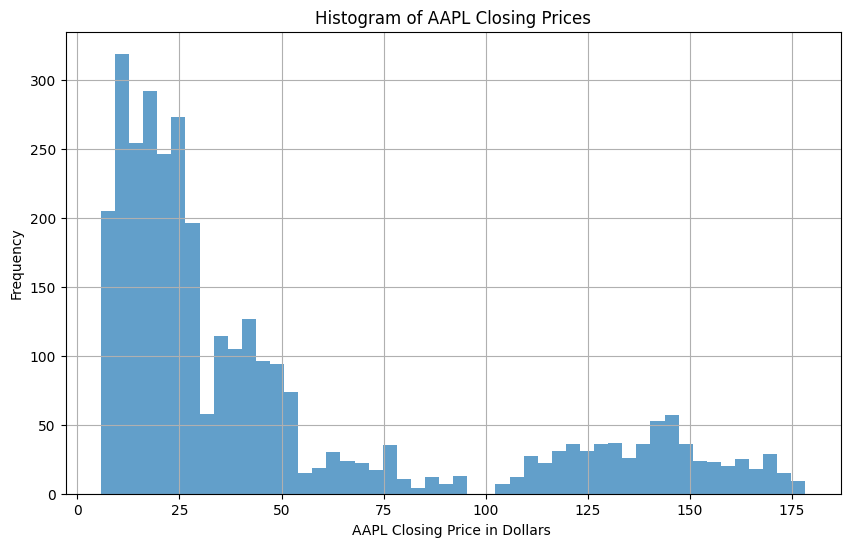

In [7]:
# Histogram of Closing Prices
plt.figure(figsize=(10, 6))
plt.hist(data['Close'], bins=50, alpha=0.7)
plt.title('Histogram of AAPL Closing Prices')
plt.xlabel('AAPL Closing Price in Dollars ')
plt.ylabel('Frequency')
plt.grid()
plt.show()

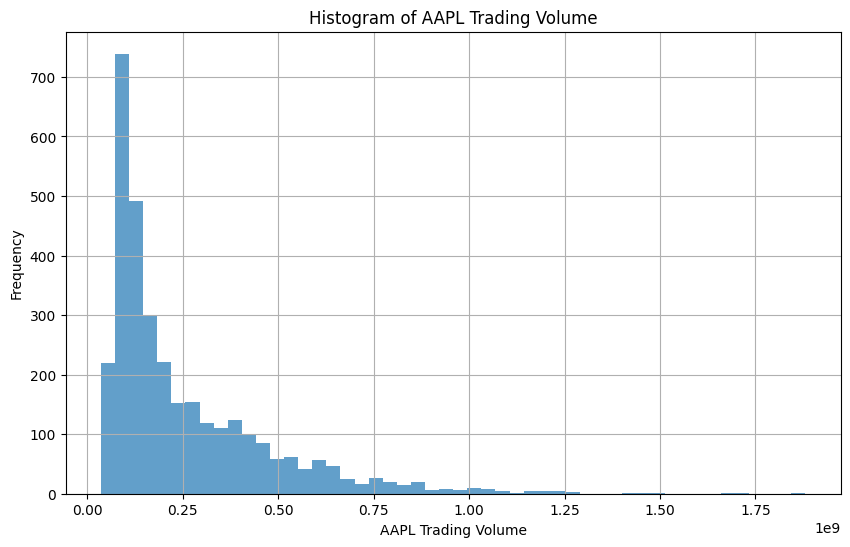

In [8]:
# Histogram distribution of Volume
plt.figure(figsize=(10, 6))
plt.hist(data['Volume'], bins=50, alpha=0.7)
plt.title('Histogram of AAPL Trading Volume')
plt.xlabel('AAPL Trading Volume')
plt.ylabel('Frequency')
plt.grid()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

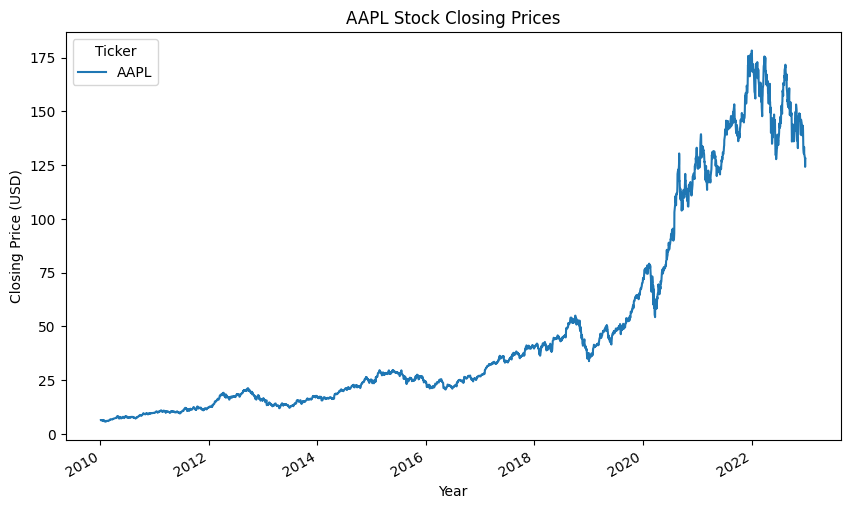

In [9]:
# Exploratory Data Analysis (EDA)
# Visualize the Stock Prices
data['Close'].plot(title='AAPL Stock Closing Prices', figsize=(10, 6))
# title axes
plt.xlabel('Year')
plt.ylabel('Closing Price (USD)')
plt.show

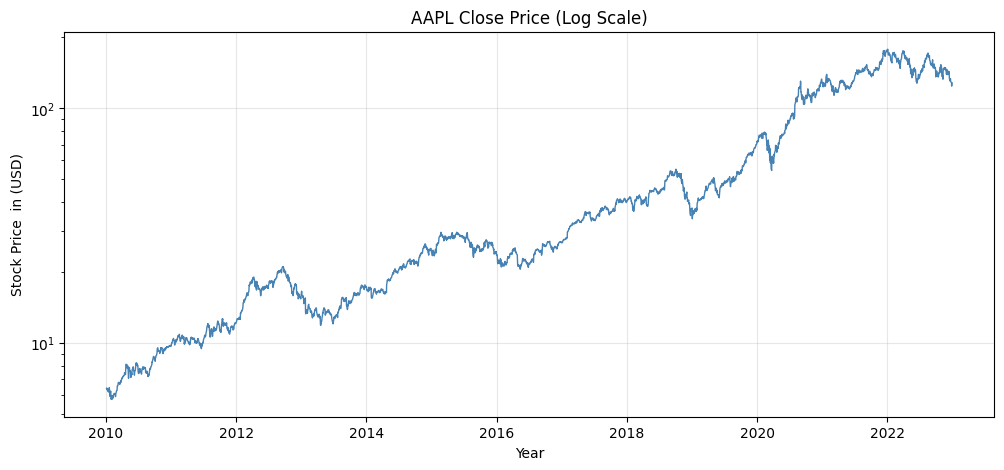

In [10]:
# 1. Price in log scale 
plt.figure(figsize=(12, 5))
plt.semilogy(data.index, data['Close'], linewidth=1, color='steelblue')
plt.title('AAPL Close Price (Log Scale)', fontsize=12)
plt.ylabel('Stock Price  in (USD)')
plt.xlabel('Year')
plt.grid(True, alpha=0.3)
plt.show()


- The closing price of the Apple stock increases over time from the year 2010 to 2022

#### Moving Averages and Basic Technical Indicators

In [11]:
# Moving Averages and Basic Techinical Indicators
# Calculate 10-day and 50 -day simple moving averages for the stock
data['MA10'] = data['Close'].rolling(window=10).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()


In [12]:
data['MA10'].tail()


Date
2022-12-23    134.805286
2022-12-27    133.380777
2022-12-28    131.466655
2022-12-29    130.126869
2022-12-30    129.479633
Name: MA10, dtype: float64

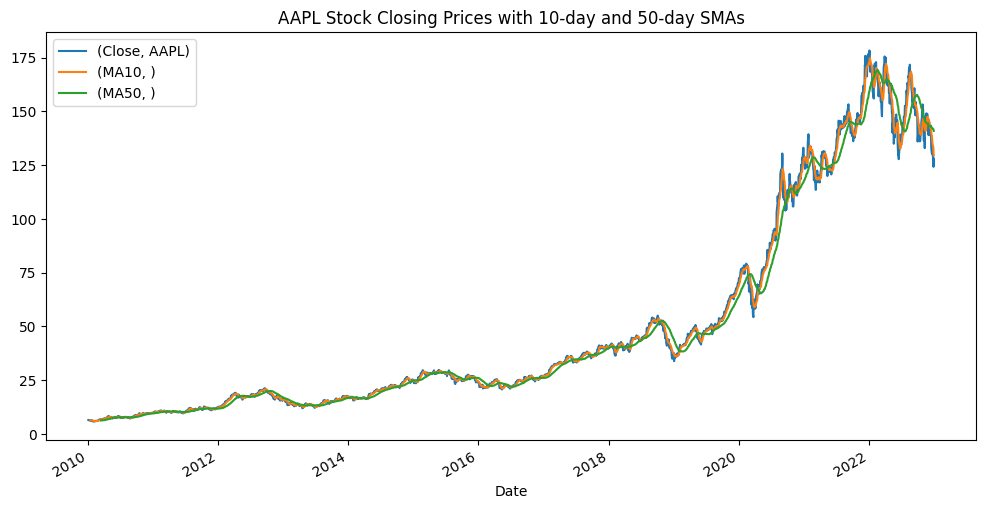

In [13]:
# Plot  the calculated SMAs along with the closing price 
data[['Close', 'MA10', 'MA50']].plot(title='AAPL Stock Closing Prices with 10-day and 50-day SMAs', figsize=(12, 6))
plt.legend()
plt.show()


- The 10‑day and 50‑day simple moving averages (MA10 and MA50) both show a clear upward trend over 2010–2022, mirroring the long‑term rise in the closing price.
-  MA10 is the faster, more responsive series and tracks short‑term price changes  around the Close, while MA50 is smoother and lags — it stays below MA10 during rising stretches and above it during declines. 
- When MA10 crosses above MA50 it signals short‑term bullish momentum; when it crosses below it signals weakening momentum. 

<Figure size 1000x500 with 0 Axes>

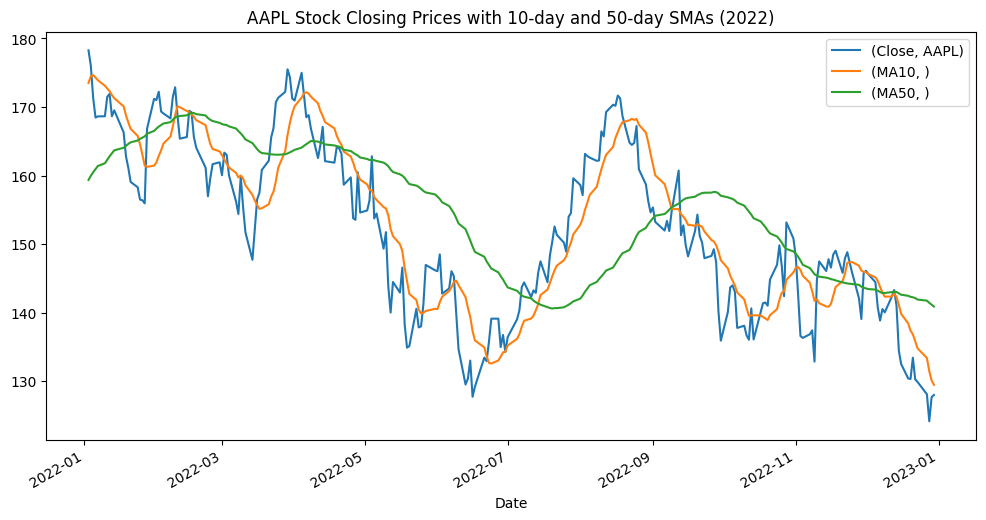

In [30]:
# zoom in to show bearish crossover
data_zoom = data['2022-01-01':'2022-12-31']
plt.figure(figsize=(10,5))
data_zoom[['Close', 'MA10', 'MA50']].plot(title='AAPL Stock Closing Prices with 10-day and 50-day SMAs (2022)', figsize=(12, 6))
plt.legend()
plt.show()      

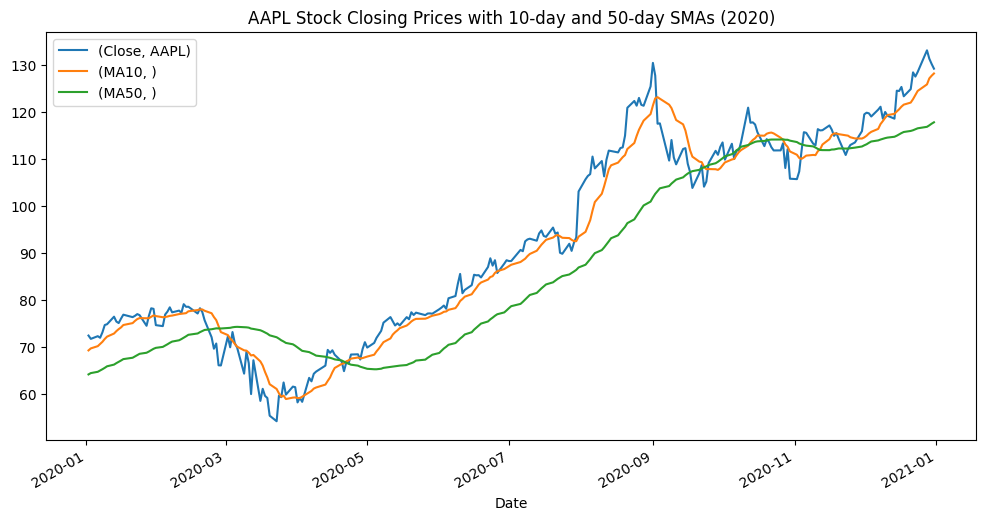

In [29]:
#zoom in to show bullish crossover
data_zoom = data['2020-01-01':'2020-12-31']
data_zoom[['Close', 'MA10', 'MA50']].plot(title='AAPL Stock Closing Prices with 10-day and 50-day SMAs (2020)', figsize=(12 , 6))
plt.legend()
plt.show()  

#### Implementing a Moving Average Crossover Strategy

In [16]:
# Implementing a Moving Average Crossover Strategy
# Generate trading signals based on the crossover of the 10-day and 50-day SMAs
data['Signal']= np.where(data['MA10'] > data['MA50'], 1, 0)  # Buy signal when MA10 > MA50
data['Position'] = data['Signal'].diff()  # Capture the change in signals to identify buy/sell points

In [17]:
data['Position'].unique()

array([nan,  0.,  1., -1.])

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3272 entries, 2010-01-04 to 2022-12-30
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   3272 non-null   float64
 1   (High, AAPL)    3272 non-null   float64
 2   (Low, AAPL)     3272 non-null   float64
 3   (Open, AAPL)    3272 non-null   float64
 4   (Volume, AAPL)  3272 non-null   int64  
 5   (MA10, )        3263 non-null   float64
 6   (MA50, )        3223 non-null   float64
 7   (Signal, )      3272 non-null   int64  
 8   (Position, )    3271 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 384.7 KB


/var/folders/vg/q66t8nnd5g5gwvf0w_gk_h7w0000gn/T/ipykernel_6281/3766340511.py:4: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  plt.plot(data[data['Position'] == 1].index, data['MA10'][data['Position'] == 1], '^', markersize=10, color='g', label='Buy Signal')


<Figure size 1000x500 with 0 Axes>

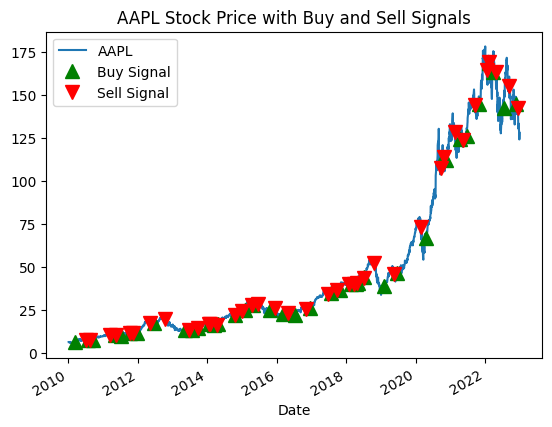

In [19]:
# Visualize the stategy signals on the stock price chart
plt.figure(figsize=(10,5))
data['Close'].plot(label='AAPL Moving Average Crossover Stategy')
plt.plot(data[data['Position'] == 1].index, data['MA10'][data['Position'] == 1], '^', markersize=10, color='g', label='Buy Signal')
plt.plot(data[data['Position'] == -1].index, data['MA10'][data['Position'] == -1], 'v', markersize=10, color='r', label='Sell Signal')
plt.title('AAPL Stock Price with Buy and Sell Signals')
plt.legend()
plt.show()

- The buy/sell signal chart shows frequent, alternating trades (whipsaws) and heavy clustering from 2010–2020, then a quiet period in 2020–2021 (only one buy and three sells), after which the alternating pattern resumes. 
- Overall there are more red (sell) arrows than green (buy) arrows, suggesting the rule generates many losing or exit signals relative to clear entry opportunities. 
- This pattern implies the strategy is noisy on this time frame, it may need smoothing (longer MA), a minimum MA gap to avoid small crossovers, or filters for volatility and transaction costs.

/var/folders/vg/q66t8nnd5g5gwvf0w_gk_h7w0000gn/T/ipykernel_6281/2770276186.py:5: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  plt.plot(data_zoom[data_zoom['Position'] == 1].index, data_zoom['MA10'][data_zoom['Position'] == 1], '^', markersize=10, color='g', label='Buy Signal')


<Figure size 1000x500 with 0 Axes>

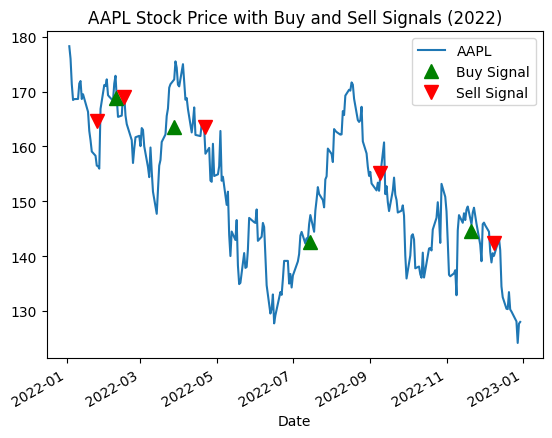

In [28]:
# zoom in in the same period used to show bearish crossover
data_zoom = data['2022-01-01':'2022-12-31']
plt.figure(figsize=(10,5))      
data_zoom['Close'].plot(label='AAPL Moving Average Crossover Stategy')
plt.plot(data_zoom[data_zoom['Position'] == 1].index, data_zoom['MA10'][data_zoom['Position'] == 1], '^', markersize=10, color='g', label='Buy Signal')
plt.plot(data_zoom[data_zoom['Position'] == -1].index, data_zoom['MA10'][data_zoom['Position'] == -1], 'v', markersize=10, color='r', label='Sell Signal')
plt.title('AAPL Stock Price with Buy and Sell Signals (2022)')
plt.legend()
plt.show()  


/var/folders/vg/q66t8nnd5g5gwvf0w_gk_h7w0000gn/T/ipykernel_6281/420540737.py:5: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  plt.plot(data_zoom[data_zoom['Position'] == 1].index, data_zoom['MA10'][data_zoom['Position'] == 1], '^', markersize=10, color='g', label='Buy Signal')


<Figure size 1000x500 with 0 Axes>

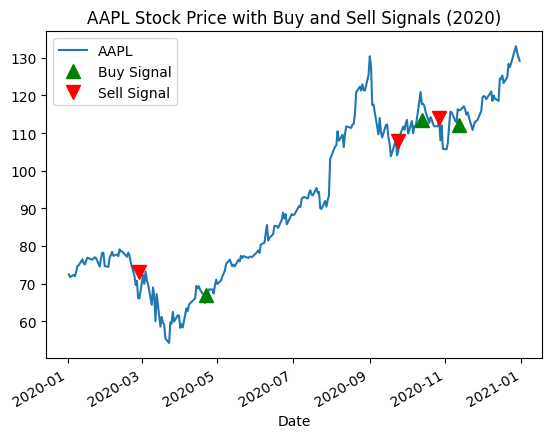

In [27]:
# zoom in to show where we had bullish crossover
data_zoom = data['2020-01-01':'2020-12-31']
plt.figure(figsize=(10,5))      
data_zoom['Close'].plot(label='AAPL Moving Average Crossover Stategy')
plt.plot(data_zoom[data_zoom['Position'] == 1].index, data_zoom['MA10'][data_zoom['Position'] == 1], '^', markersize=10, color='g', label='Buy Signal')
plt.plot(data_zoom[data_zoom['Position'] == -1].index, data_zoom['MA10'][data_zoom['Position'] == -1], 'v', markersize=10, color='r', label='Sell Signal')
plt.title('AAPL Stock Price with Buy and Sell Signals (2020)')
plt.legend()
plt.show()

#### Backtesting The Strategy

GOAL: Simulate the execution of the trading strategy using historical Data to evaluate its hypothetical performance

In [17]:
# Backtesting the Strategy
# Prepare  data for backtesting
# Initialize the portfolio DataFrame with positions
portfolio= pd.DataFrame(index=data.index)
portfolio['Position'] = data['Position']
if 'Adj Close' not in data.columns:
    data['Adj Close'] = data['Close']
portfolio['Adj Close'] = data['Adj Close']
portfolio['Position'] = data['Position']

portfolio['Holdings'] = portfolio['Position'].cumsum() * portfolio['Adj Close'].fillna(0)
initial_cash= 100000  # Starting with $100,000
portfolio['Cash'] = initial_cash - (data['Position'] * data['Adj Close']).cumsum()
portfolio['Total'] = portfolio['Holdings'] + portfolio['Cash']
portfolio['Returns'] = portfolio['Total'].pct_change().fillna(0)
portfolio.tail(50)

,Position,Adj Close,Holdings,Cash,Total,Returns
Date,,,,,,
2022-10-20,0.0,141.024979,0.000000,100094.211143,100094.211143,0.000000
2022-10-21,0.0,144.841003,0.000000,100094.211143,100094.211143,0.000000
2022-10-24,0.0,146.985046,0.000000,100094.211143,100094.211143,0.000000
2022-10-25,0.0,149.827362,0.000000,100094.211143,100094.211143,0.000000
2022-10-26,0.0,146.886719,0.000000,100094.211143,100094.211143,0.000000
2022-10-27,0.0,142.411758,0.000000,100094.211143,100094.211143,0.000000
2022-10-28,0.0,153.171326,0.000000,100094.211143,100094.211143,0.000000
2022-10-31,0.0,150.810883,0.000000,100094.211143,100094.211143,0.000000
2022-11-01,0.0,148.165237,0.000000,100094.211143,100094.211143,0.000000


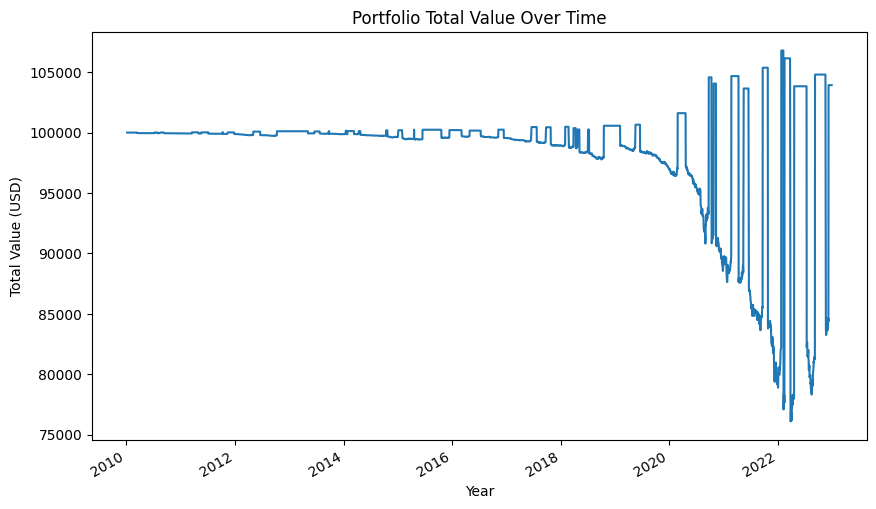

In [18]:
# Calculate the total value
initial_capital = 100000  # Starting capital
portfolio['Cash'] = initial_capital - (portfolio['Holdings'].diff() * data['Adj Close']).cumsum()
portfolio['Total'] = portfolio['Holdings'] + portfolio['Cash']

portfolio['Total'].plot(title='Portfolio Total Value Over Time', figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Total Value (USD)')
plt.show()

- The portfolio was mostly flat from 2010 through about 2016, showing only small up‑and‑down movements and little net growth. 
- After 2016 volatility increases and the trend deteriorates,especially through 2018–2021, where the portfolio shows a general downward trend interrupted by a few strong up months.
-  In 2021–2022 the portfolio exhibits very large changes (sharp spikes and deep drops), indicating higher risk, larger drawdowns, and sensitivity to market moves or noisy signals. 
- The portfolio perfomance suggests weak early performance, worse risk‑adjusted results during 2018–2021, and unstable outcomes recently. 
The startegy underperormed as it generates too many false signals and doesn't capture long term trends effectively.

# Model Selection and Machine Learning

#### Compare different machine learning models to predict future price movements and stock returns.


In [19]:

# Feature Engineering 
# Create features from historical price data that will be used as inputs for the machine learning models
data['Return'] = data['Adj Close'].pct_change()  # Daily returns
data['MA10'] = data['Adj Close'].rolling(window=10).mean()
data['MA50'] = data['Adj Close'].rolling(window=50).mean()
data.head()


Price,Close,High,Low,Open,Volume,MA10,MA50,Signal,Position,Adj Close,Return
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,
Date,,,,,,,,,,,
2010-01-04,6.418383,6.433079,6.369498,6.400988,493729600,NaN,NaN,0,NaN,6.418383,NaN
2010-01-05,6.429481,6.465770,6.395590,6.436079,601904800,NaN,NaN,0,0.0,6.429481,0.001729
2010-01-06,6.327212,6.454974,6.320614,6.429482,552160000,NaN,NaN,0,0.0,6.327212,-0.015906
2010-01-07,6.315515,6.358102,6.269628,6.350604,477131200,NaN,NaN,0,0.0,6.315515,-0.001849
2010-01-08,6.357500,6.358100,6.269927,6.307115,447610800,NaN,NaN,0,0.0,6.357500,0.006648


In [ ]:
# Train and compare Models
# Split data into training set and test set
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC # Support Vector Classifier
from sklearn.metrics import accuracy_score


data = yf.download('AAPL', start='2010-01-01', end='2022-12-31')
#  Compute returns and moving averages
data['Returns'] = data['Close'].pct_change()
data['MA10'] = data['Close'].rolling(window=10).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()

# We drop the NaN values after the shifting operation to align the indices
data['Target'] = (data['Returns'].shift(-1) > 0).astype(int)
data.dropna(inplace=True)  # Make sure to drop NaN values to align 'X' and 'y'

# Prepare the features (X) and target (y)
X = data[['Returns', 'MA10', 'MA50']]
y = data['Target']



/var/folders/vg/q66t8nnd5g5gwvf0w_gk_h7w0000gn/T/ipykernel_1991/2245141686.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('AAPL', start='2010-01-01', end='2022-12-31')
[*********************100%***********************]  1 of 1 completed


In [ ]:

data.head()

Price,Close,High,Low,Open,Volume,Returns,MA10,MA50,Target
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,
Date,,,,,,,,,
2010-03-16,6.731489,6.747384,6.673306,6.723391,446908000,0.002725,6.616984,6.206868,0
2010-03-17,6.721593,6.791472,6.696101,6.744986,450956800,-0.001470,6.661341,6.212933,1
2010-03-18,6.737488,6.747984,6.676306,6.720992,342109600,0.002365,6.703148,6.219093,0
2010-03-19,6.665509,6.755182,6.634918,6.741687,559445600,-0.010683,6.713045,6.225859,1
2010-03-22,6.740488,6.777977,6.602529,6.612126,456419600,0.011249,6.730050,6.234358,1


In [22]:
#: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=42)


rf = RandomForestClassifier(random_state=42)
log_reg = LogisticRegression()
svm = SVC() # Support Vector Classifier

models = [rf, log_reg, svm]

for model in models:
    model.fit(X_train, y_train)

predictions = [model.predict(X_test) for model in models]
for i, model in enumerate(models):
    accuracy = accuracy_score(y_test, predictions[i])
    print(f"{model.__class__.__name__} Accuracy: {accuracy}")

RandomForestClassifier Accuracy: 0.5148883374689827
LogisticRegression Accuracy: 0.53287841191067
SVC Accuracy: 0.5390818858560794


- SVC (Support Vector Classifier) performed the best with an accuracy of 53.91%, followed by LogisticRegression at 53.29%, and RandomForestClassifier at 51.49%.
- The 3 models are only performing slightly better than random guessing(50%)
- The marginal improvement (51%-53%) over 50% suggests that the  current approach has limited predictive power.




In [23]:
# Performance Metrics and Model Evaluation
# Calculate perfomance metrics
from sklearn.metrics import confusion_matrix, classification_report
# Predict on test set
for model in models:
 predictions = model.predict(X_test)
 

 # Calculate metrics
 conf_matrix = confusion_matrix(y_test, predictions)
 print(conf_matrix)
 report = classification_report(y_test, predictions)
 print(report)


[[373 379]
 [403 457]]
              precision    recall  f1-score   support

           0       0.48      0.50      0.49       752
           1       0.55      0.53      0.54       860

    accuracy                           0.51      1612
   macro avg       0.51      0.51      0.51      1612
weighted avg       0.52      0.51      0.52      1612

[[142 610]
 [143 717]]
              precision    recall  f1-score   support

           0       0.50      0.19      0.27       752
           1       0.54      0.83      0.66       860

    accuracy                           0.53      1612
   macro avg       0.52      0.51      0.46      1612
weighted avg       0.52      0.53      0.48      1612

[[ 50 702]
 [ 41 819]]
              precision    recall  f1-score   support

           0       0.55      0.07      0.12       752
           1       0.54      0.95      0.69       860

    accuracy                           0.54      1612
   macro avg       0.54      0.51      0.40      1612
weigh

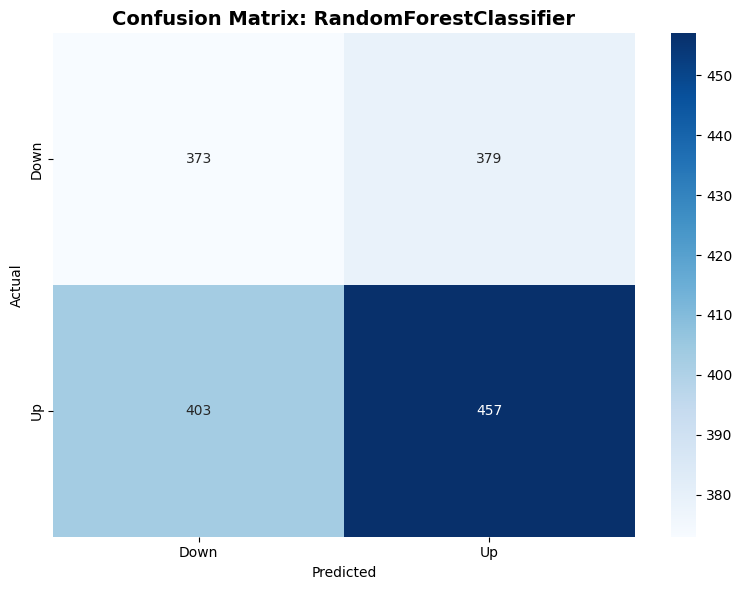

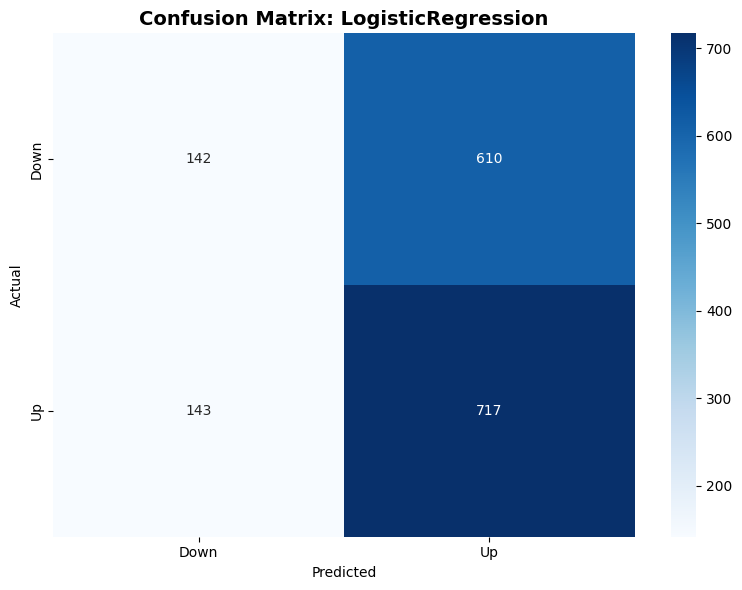

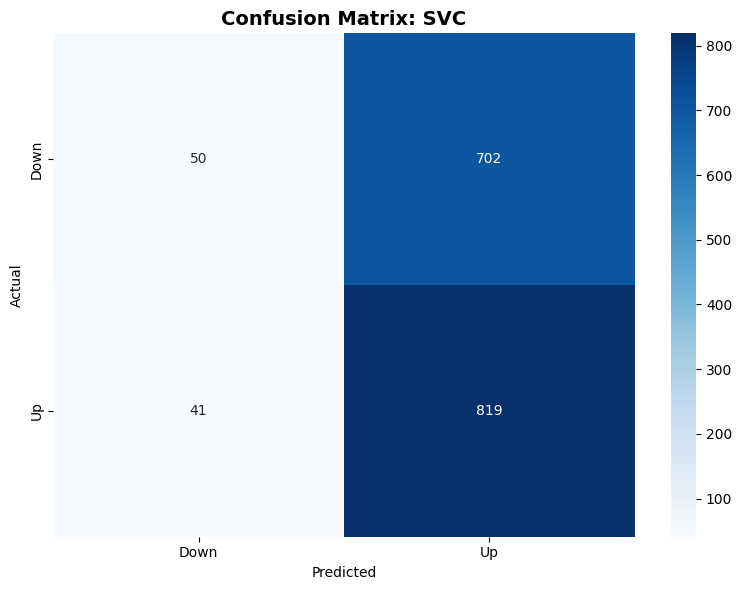

In [ ]:
# Visualize the confusion Matrix
for model in models:
    predictions = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
    plt.title(f'Confusion Matrix: {model.__class__.__name__}', fontsize=14, fontweight='bold')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

### Understanding Confusion Matrix Heatmaps


A confusion matrix for binary classification is a 2×2 grid showing **actual labels (rows)** vs **predicted labels (columns)**:

```
                    Predicted: Down    Predicted: Up
Actual: Down          TN (✓)            FP (✗)
Actual: Up            FN (✗)            TP (✓)
```

**Legend:**
- **TN (True Negatives)**: Top-left - Correctly predicted DOWN days ✓
- **FP (False Positives)**: Top-right - Incorrectly predicted UP (actually DOWN) ✗
- **FN (False Negatives)**: Bottom-left - Incorrectly predicted DOWN (actually UP) ✗
- **TP (True Positives)**: Bottom-right - Correctly predicted UP days ✓


##### Random Forest Classifier
- Uses multiple decision trees to make predictions
- Confusion Matrix: [[370, 382], [400, 460]]
- Balanced but weak: 51% accuracy, barely better than random
- Precision (0.55): Only 55% of "up" predictions were correct
- Recall (0.53): Caught only 53% of actual up days
- Verdict: Unreliable for trading


##### Logistic Regression
- Uses binary classification
- Confusion Matrix: [[142, 610], [143, 717]]
- Accuracy: 53.28% 
- High Recall (0.83): Catches 83% of actual up days, excellent for not missing opportunities!
- Low Precision (0.54): But generates 610 false positives - lots of wrong signals
- Trade-off: Would miss a few gains, but execute many losing trades
- Verdict: Aggressive strategy-  too many false alarms


##### SVC (Support Vector Classification)
- Finds optimal boundaries between classes
- Confusion Matrix: [[50, 702], [41, 819]]
- Accuracy: 53.91%
- Extremely High Recall: Only 41 false negatives (catches almost all up days)
- Very Low Precision: 702 false positives - predicts "up" constantly
- Trade-off: Almost never misses a real up day, but most predictions are wrong
- Verdict: Overly aggressive - essentially just predicting "up" for everything


- All three models are poor predictors with weak precision-recall tradeoffs. 
- SVC and LogisticRegression sacrifice precision (reliability) for recall (coverage)- you'd execute many losing trades. 
- RandomForest is balanced but equally weak overall.

##### Gradient Boosting Models (XGBoost and LightGBM)

In [ ]:
# Train Gradient Boosting Models (XGBoost and LightGBM)
import xgboost as xgb  
import lightgbm as lgb 

# Re-use the existing X_train, X_test, y_train, y_test 

# Fix feature names for LightGBM (remove special characters)
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()
X_train_copy.columns = ['Returns', 'MA10', 'MA50']
X_test_copy.columns = ['Returns', 'MA10', 'MA50']

# Initialize XGBoost model with optimized hyperparameters
xgboost_model = xgb.XGBClassifier(
    n_estimators=100,          # Number of boosting rounds
    learning_rate=0.1,         # Slow learning to avoid overfitting
    max_depth=5,               # Shallow trees to prevent overfitting
    min_child_weight=20,       # Require strong signal
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    verbosity=0
)

# Initialize LightGBM model
lgb_model = lgb.LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    min_child_samples=20,
    random_state=42,
    verbose=-1
)

# Add to models list
gradient_boosting_models = [xgboost_model, lgb_model]

# Train the gradient boosting models
for model in gradient_boosting_models:
    model.fit(X_train_copy, y_train)

print("✓ XGBoost trained")
print("✓ LightGBM trained")

# Get predictions
gb_predictions = [model.predict(X_test_copy) for model in gradient_boosting_models]

# Calculate accuracy
print("\n─── Gradient Boosting Model Accuracy ───")
for i, model in enumerate(gradient_boosting_models):
    accuracy = accuracy_score(y_test, gb_predictions[i])
    print(f"{model.__class__.__name__} Accuracy: {accuracy:.4f}")

✓ XGBoost trained
✓ LightGBM trained

─── Gradient Boosting Model Accuracy ───
XGBClassifier Accuracy: 0.5217
LGBMClassifier Accuracy: 0.5062


─── Gradient Boosting Model Performance Metrics ───


XGBClassifier:
              precision    recall  f1-score   support

           0       0.49      0.44      0.46       752
           1       0.55      0.60      0.57       860

    accuracy                           0.52      1612
   macro avg       0.52      0.52      0.52      1612
weighted avg       0.52      0.52      0.52      1612



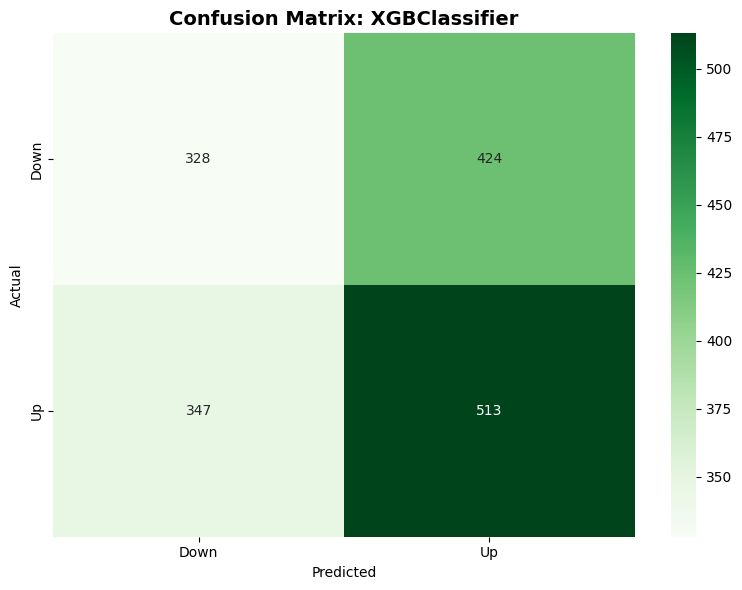


LGBMClassifier:
              precision    recall  f1-score   support

           0       0.47      0.44      0.46       752
           1       0.54      0.56      0.55       860

    accuracy                           0.51      1612
   macro avg       0.50      0.50      0.50      1612
weighted avg       0.50      0.51      0.50      1612



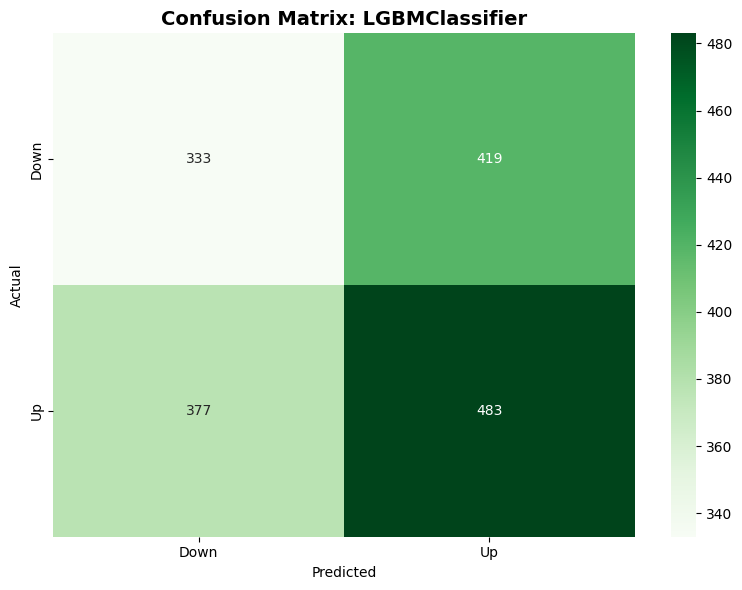

In [40]:
# Visualize Confusion Matrices for Gradient Boosting Models
print("─── Gradient Boosting Model Performance Metrics ───\n")

for i, model in enumerate(gradient_boosting_models):
    predictions = gb_predictions[i]
    conf_matrix = confusion_matrix(y_test, predictions)
    report = classification_report(y_test, predictions)
    
    print(f"\n{model.__class__.__name__}:")
    print(report)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', 
                xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
    plt.title(f'Confusion Matrix: {model.__class__.__name__}', fontsize=14, fontweight='bold')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()


### Capital Asset Pricing Model Analysis

In [ ]:
#Capital Asset Pricing Model (CAPM) Analysis
# Calculate daily returns
import yfinance as yf
import pandas as pd
import statsmodels.api as sm

In [ ]:
# We'll grab 1 year of daily closing prices for our stocks + the market index (S&P 500).
tickers = ['TSLA', 'MSFT', 'GS', '^GSPC']
data = yf.download(tickers, period='1y', interval='1d')['Close']

# Rename the market column
data = data.rename(columns={'^GSPC': 'SP500'})

/var/folders/vg/q66t8nnd5g5gwvf0w_gk_h7w0000gn/T/ipykernel_35595/2133156517.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, period='1y', interval='1d')['Close']
[*********************100%***********************]  4 of 4 completed


In [ ]:
# pct_change() gives (today - yesterday) / yesterday
returns = data.pct_change().dropna()

# Quick check
returns.head()

Ticker,GS,MSFT,TSLA,SP500
Date,,,,
2025-01-17,0.021126,0.010481,0.030641,0.009991
2025-01-21,0.014059,-0.001235,-0.005698,0.008768
2025-01-22,-0.003167,0.041307,-0.021129,0.006138
2025-01-23,0.010700,0.001143,-0.006577,0.005313
2025-01-24,-0.004066,-0.005932,-0.014065,-0.002855


In [ ]:
rf_annual = 0.04 # We assume the annual risk free rate to be 4% and then convert it to daily rate

rf_daily  = (1 + rf_annual)**(1/252) - 1    # Hint: the second blank refers to the number of trading days in a year

# Add a column of the calculated daily returns to our data
returns['RF'] = rf_daily

In [ ]:
# Next we create a dataframe consisting of the excess returns each stock compared to the market index which is S&P 500
excess = pd.DataFrame({
    'SP500_exc': returns['SP500'] - returns['RF'],
})
for stock in ['TSLA','MSFT','GS']:
    excess[f'{stock}_exc'] = returns[stock] - returns['SP500']

# Take a look at the excess table
excess.head()

,SP500_exc,TSLA_exc,MSFT_exc,GS_exc
Date,,,,
2025-01-17,0.009835,0.020650,0.000490,0.011135
2025-01-21,0.008613,-0.014466,-0.010004,0.005291
2025-01-22,0.005982,-0.027267,0.035169,-0.009305
2025-01-23,0.005158,-0.011890,-0.004171,0.005386
2025-01-24,-0.003011,-0.011210,-0.003077,-0.001211


In [ ]:
def run_capm(y_exc, x_exc):
    """
    Performs Ordinary Least Square (OLS) regression of y_exc ~ x_exc
    Returns the fitted model so we can inspect alpha & beta.
    """
    X = sm.add_constant(x_exc)      # adds alpha, the intercept
    model = sm.OLS(y_exc, X).fit()  # This will run a regression model on the provided data and return a model with each stock's alpha and beta.
    return model

In [ ]:
# First, we will create a dictionary to store the results for every stock
results = {}

#This will run regression model on each of our stock and return their respective results
for stock in ['TSLA','MSFT','GS']:
    y_exc = excess[f'{stock}_exc']
    x_exc = excess['SP500_exc']
    model = run_capm(y_exc, x_exc)
    results[stock] = {
        'alpha': model.params['const'],
        'beta' : model.params['SP500_exc'],
        'R2'   : model.rsquared,
    }

# Display results
pd.DataFrame(results).T.rename_axis('Ticker').round(4)

,alpha,beta,R2
Ticker,,,
TSLA,-0.0004,1.3035,0.2227
MSFT,-0.0002,-0.0946,0.0098
GS,0.0012,0.3784,0.1321


In [ ]:
# Building Efficient frontier
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [ ]:
# Download stocks
tickers = ["NVDA", "GOOGL", "GS", "LLY", "WMT", "^GSPC"]
start_date = "2023-06-05"
end_date   = "2025-06-05"

In [ ]:
raw_data = yf.download(tickers, start=start_date, end=end_date, progress=True)

/var/folders/vg/q66t8nnd5g5gwvf0w_gk_h7w0000gn/T/ipykernel_35595/1787448472.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  raw_data = yf.download(tickers, start=start_date, end=end_date, progress=True)
[*********************100%***********************]  6 of 6 completed


In [ ]:
prices = raw_data['Close'].copy()

In [ ]:
print(prices.head())

Ticker           GOOGL          GS         LLY       NVDA        WMT  \
Date                                                                   
2023-06-05  125.065048  302.881470  436.368042  39.138477  48.520752   
2023-06-06  126.355301  307.577942  435.199219  38.621902  48.514275   
2023-06-07  121.581360  316.001495  428.618195  37.447750  48.585529   
2023-06-08  121.224060  315.738007  437.743164  38.482002  49.288403   
2023-06-09  121.313393  316.255615  438.116425  38.741817  49.586388   

Ticker            ^GSPC  
Date                     
2023-06-05  4273.790039  
2023-06-06  4283.850098  
2023-06-07  4267.520020  
2023-06-08  4293.930176  
2023-06-09  4298.859863  


In [ ]:
# Calculate daily returns and drop any missing values
returns = prices.pct_change().dropna()

In [ ]:
#Compute mean of the daily returns
mean_daily_returns = returns.mean()
mean_daily_returns

Ticker
GOOGL    0.000761
GS       0.001503
LLY      0.001351
NVDA     0.003108
WMT      0.001508
^GSPC    0.000719
dtype: float64

In [ ]:
#Compute the covariance
cov_matrix_daily = returns.cov()
print(cov_matrix_daily)

Ticker     GOOGL        GS       LLY      NVDA       WMT     ^GSPC
Ticker                                                            
GOOGL   0.000354  0.000114  0.000055  0.000275  0.000045  0.000116
GS      0.000114  0.000325  0.000069  0.000217  0.000070  0.000132
LLY     0.000055  0.000069  0.000475  0.000169  0.000069  0.000077
NVDA    0.000275  0.000217  0.000169  0.001074  0.000057  0.000226
WMT     0.000045  0.000070  0.000069  0.000057  0.000171  0.000057
^GSPC   0.000116  0.000132  0.000077  0.000226  0.000057  0.000103


In [ ]:
#Compute the correlation
corr_matrix_daily = returns.corr()
print(corr_matrix_daily)

Ticker     GOOGL        GS       LLY      NVDA       WMT     ^GSPC
Ticker                                                            
GOOGL   1.000000  0.335750  0.133083  0.445189  0.181691  0.608100
GS      0.335750  1.000000  0.174890  0.367533  0.298187  0.720083
LLY     0.133083  0.174890  1.000000  0.236889  0.241783  0.348646
NVDA    0.445189  0.367533  0.236889  1.000000  0.133598  0.680407
WMT     0.181691  0.298187  0.241783  0.133598  1.000000  0.428935
^GSPC   0.608100  0.720083  0.348646  0.680407  0.428935  1.000000


In [ ]:
# Next, we annualize all the daily statistics by multiplying with 252, which is the number of trading days in a year.
trading_days = 252
mean_annual_returns = mean_daily_returns * trading_days
cov_matrix_annual = cov_matrix_daily * trading_days

volatility_annual = returns.std() * np.sqrt(trading_days)

In [ ]:
import statsmodels.api as sm

# First, we will prepare returns for the market index anf indivudual stocks
market_ret = returns["^GSPC"]       # daily market (S&P 500) returns
stock_rets = returns.drop(columns="^GSPC")  # the five individual stocks

# For each stock, regress its returns on the market returns
alphas = {}
betas  = {}
for ticker in stock_rets.columns:
    y = stock_rets[ticker]               # dependent variable
    X = sm.add_constant(market_ret)      # add intercept term
    model = sm.OLS(y, X).fit()           # ordinary least squares
    alphas[ticker] = model.params["const"]
    betas[ticker]  = model.params["^GSPC"]

#Store the alphas and betas neatly in a Pandas table
import pandas as pd

regression_table = pd.DataFrame({
    "Alpha (daily)" : alphas,
    "Beta"          : betas
})

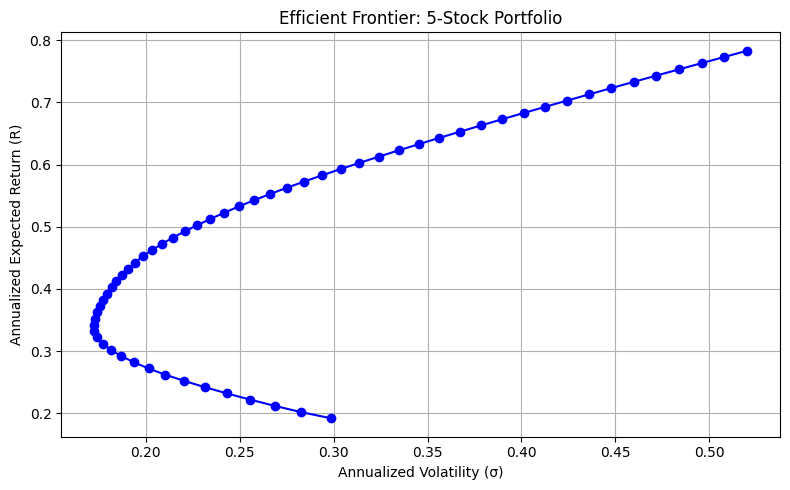

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Helper function to find the portfolio allocation that yields the lowest possible risk
def efficient_frontier(mu, Sigma, n_points=100):
    """
    mu : array of expected returns of the stocks
    Sigma : covariance matrix of the stocks
    Compute a long-only efficient frontier:
      - minimize portfolio volatility σ = sqrt(wᵀ Σ w)
      - subject to: sum(w) = 1, wᵀ mu = R_target, and 0 ≤ w_i ≤ 1
    Returns:
      vols      : array of volatilities (σ) along the frontier
      rets      : matching target returns (R_target)
      weights   : list of optimal weight vectors for each point
    """
    n = len(mu)
    vols, rets, weights = [], [], []

    # spread target returns evenly between worst and best single-stock μ
    R_targets = np.linspace(mu.min(), mu.max(), n_points)

    for R in R_targets:

        # objective: portfolio volatility
        objective = lambda w: np.sqrt(w @ Sigma @ w)

        # constraints:
        #  - fully invested: sum(w) = 1
        #  - achieve target return: wᵀ mu = R
        cons = (
            {"type": "eq", "fun": lambda w: np.sum(w) - 1.0},
            {"type": "eq", "fun": lambda w: w @ mu - R}
        )

        # long-only bounds: 0 ≤ w_i ≤ 1
        bounds = [(0.0, 1.0)] * n

        # start from equal weights
        w0 = np.repeat(1/n, n)

        result = minimize(objective, w0, bounds=bounds, constraints=cons)
        if result.success:
            vols.append(result.fun)      # minimized σ
            rets.append(R)               # target return
            weights.append(result.x)     # optimal weights

    return np.array(vols), np.array(rets), weights


# 2. Annualize daily statistics
trading_days = 252
mu_annual    = returns.mean() * trading_days
Sigma_annual = returns.cov() * trading_days

# 3. Select the five stocks and extract sub-vector & sub-matrix
tickers   = ["NVDA", "GOOGL", "GS", "LLY", "WMT"]
mu_vec    = mu_annual.loc[tickers].values               # shape (5,)
Sigma_sub = Sigma_annual.loc[tickers, tickers].values   # shape (5,5)


# 4. Compute the frontier
vols5, rets5, weights5 = efficient_frontier(mu_vec, Sigma_sub, n_points=60)


# 5. Plot the efficient frontier
plt.figure(figsize=(8, 5))
plt.plot(vols5, rets5, marker='o', linestyle='-', color='blue')
plt.title("Efficient Frontier: 5-Stock Portfolio")
plt.xlabel("Annualized Volatility (σ)")
plt.ylabel("Annualized Expected Return (R)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Find the index of the smallest volatility in vols5
idx_min = np.argmin(vols5)

# Get the corresponding weight vector from weights5
min_risk_weights = weights5[idx_min]


# Show the results
print("Lowest risk (σ):", vols5[idx_min])
print("Expected return at lowest risk (R):", rets5[idx_min])

for i, ticker in enumerate(tickers):
    weight = min_risk_weights[i]
    print(f"{ticker}: {weight:.3%}")




Lowest risk (σ): 0.17232311902773148
Expected return at lowest risk (R): 0.3422276213295177
NVDA: 0.074%
GOOGL: 17.457%
GS: 16.322%
LLY: 12.639%
WMT: 53.508%


Milestone 11

In [ ]:
import datetime
import yfinance as yf
import pandas as pd


initial_capital = 10_000.00   # We start with $10,000
ticker          = "NVDA"      # Nvidia Stock
end_date        = "2025-05-29"
start_date      = "2024-05-29"

# Download daily Close prices for the past year
data   = yf.download(ticker, start=start_date, end=end_date, progress=False)
prices = data["Close"].dropna()
prices

/var/folders/vg/q66t8nnd5g5gwvf0w_gk_h7w0000gn/T/ipykernel_35595/2076428810.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data   = yf.download(ticker, start=start_date, end=end_date, progress=False)


Ticker,NVDA
Date,
2024-05-29,114.766441
2024-05-30,110.443657
2024-05-31,109.577103
2024-06-03,114.941360
2024-06-04,116.377632
...,...
2025-05-21,131.776077
2025-05-22,132.805893
2025-05-23,131.266174


In [ ]:
# In this code block we will compute the RSI signals and make a decision whether to go long or to stay flat.

# One thing to note here is, for simplification, we assume that we are purchasing fractional shares. That is if we have to go long, we invest all the capital that we have.

import numpy as np
import pandas as pd

# If `prices` is a DataFrame (multi-column), extract the NVDA series
if isinstance(prices, pd.DataFrame):
    prices = prices["NVDA"]

# 1. Calculate daily price changes
delta = prices.diff()

''' 2. Separate gains and losses. This will create two different columns gain and loss, where column gain will only contain positive price changes
and the negative price changes will be 0. The same would apply loss column.'''
gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)

# 3. Now we calculate average gain/loss over a period of 14 days. Feel free to tweak the value of N to observe different amount of profits.
N = 14
avg_gain = gain.rolling(window=N).mean()
avg_loss = loss.rolling(window=N).mean()

# 4. Compute RS and RSI
rs  = avg_gain / avg_loss
rsi = 100 - (100 / (1 + rs))

''' 5. Now, based on the rsi values of each row, we decide whether to buy or sell a stock.
 1 -> Buy
 -1 -> Sell
 0 -> Do nothing
 As a starting point, we use the conventional rule that says if the RSI < 30 we buy and if RSI > 70 we sell a stock. '''
signal = pd.Series(0, index=prices.index, dtype=int)
signal.loc[rsi <30] = 1
signal.loc[rsi > 70] = -1

# 6. Convert actions into daily positions:
# Here, since we are only considering long only trading strategy, we change the selling signals to 0.
positions = signal.replace(-1, 0)

# If any row is NaN, carry forward the last position
positions = positions.ffill()

# avoid look-ahead bias: shift signals so trades execute at the next day’s price
positions = positions.shift(1).fillna(0)

In [ ]:
#  Backtest our trading strategy.

# 1. Compute daily simple returns
returns = prices.pct_change().fillna(0)

# 2. Strategy returns: If we are taking a long position it returns some value, else it returns 0 because we are not taking any position
strat_rets   = positions * returns

# 3. Update your capital each day by applying that day’s return
equity_curve =initial_capital * (1 + strat_rets).cumprod()

In [ ]:
# ─── Block 4: Performance Summary ───

final_amount = equity_curve.iloc[-1]
net_profit   = final_amount -initial_capital

print(f"Initial Capital : ${initial_capital:,.2f}")
print(f"Final Amount    : ${final_amount:,.2f}")
print(f"Net Profit      : ${net_profit:,.2f}")




Initial Capital : $10,000.00
Final Amount    : $13,466.43
Net Profit      : $3,466.43
